<a href="https://colab.research.google.com/github/AlexeyTri/SemMed_fall25/blob/main/Seminar1/SemMed1_fall25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предобработка данных и функции потерь в линейной регрессии

## Данные
Для демонстраций загрузим набор данных https://archive.ics.uci.edu/dataset/10/automobile. В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [1]:
import pandas as pd

In [2]:
X_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None, na_values=["?"])

In [4]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       164 non-null    float64
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       203 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      201 non-null    float64
 19  19      201 non-null    float64
 20  20      205 non-null    float64
 21  21      203 non-null    float64
 22  22

## Предобработка данных

Предобработка данных важна при применении любых методов машинного обучения, а в особенности для линейных моделей. В sklearn предобработку удобно делать с помощью модуля preprocessing или методов библиотеки pandas.

In [5]:
from sklearn import impute

In [6]:
X_raw[25].isna().sum()

np.int64(4)

## Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет исключение при попытке передать такую матрицу в функцию обучения модели или даже предобработки. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:

заполнить средними (mean, median);
предсказывать пропущенные значения по непропущенным.
Последний вариант сложный и применяется редко. Для заполнения константами можно использовать метод датафрейма fillna, для замены средними - класс preprocessing.Imputer.

In [7]:
X_raw = X_raw[X_raw[25].notna()]

In [8]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
y.shape, X_raw.shape

((201,), (201, 25))

In [9]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [14]:
(X_raw.dtypes == 'object').values

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False])

In [10]:
cat_feature_mask = (X_raw.dtypes == 'object').values

In [15]:
X_real = X_raw[X_raw.columns[~cat_feature_mask]]
impute_mean = impute.SimpleImputer(strategy='mean')
X_no_mis_real = pd.DataFrame(impute_mean.fit_transform(X_real), columns=X_real.columns)
X_no_mis_real

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
197,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
199,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0


In [16]:
X_cat = X_raw[X_raw.columns[cat_feature_mask]].fillna("")
X_cat.reset_index(drop=True, inplace=True)
X_cat

,2,3,4,5,6,7,8,14,15,17
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [17]:
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)
X_no_mis

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,...,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,...,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,...,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [18]:
X_no_mis_real.shape, X_cat.shape, X_no_mis.shape

((201, 15), (201, 10), (201, 25))

## Преобразование нечисловых признаков

Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась вещественная матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам.

Пример: некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Это пример категориального признака, принимающего значения из неупорядоченного конечного множества
. К таким признакам обычно применяют one-hot encoding (вместо одного признака создают
 бинарных признаков - по одному на каждое возможное значение исходного признака). В sklearn это можно сделать с помощью классов LabelEncoder + OneHotEncoding, но проще использовать функцию pd.get_dummies.

Следует заметить, что в новой матрице будет очень много нулевых значений. Чтобы не хранить их в памяти, можно задать параметр OneHotEncoder(sparse = True) или .get_dummies(sparse=True), и метод вернет разреженную матрицу, в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов sklearn умеют работать с разреженными матрицами.

Вопрос: какая проблема возникнет при применении такого способа кодирования для обучения линейной регрессии?

In [19]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True, dtype=int)
X_dum.shape

(201, 65)

In [20]:
X_dum.head()

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


## Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу. Это важно по нескольким причинам:

ускорение обучения модели;

улучшение численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем чисел с плавающей точкой больше, чем с области больших чисел)

для линейных моделей: интерпретация весов при признаках как меры их значимости.

Первый популярный способ масштабирования - нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение (StandardScaler в sklearn). Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (MinMaxScaler в sklearn).

In [21]:
from sklearn import preprocessing
normalize = preprocessing.MinMaxScaler()
X_dum.columns = X_dum.columns.astype(str)
X_real_norm_np = normalize.fit_transform(X_dum)
type(X_real_norm_np)

numpy.ndarray

In [22]:
X_real_norm_np

array([[1.        , 0.29842932, 0.05830904, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29842932, 0.05830904, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.29842932, 0.2303207 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.15706806, 0.65597668, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.15706806, 0.65597668, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.15706806, 0.65597668, ..., 1.        , 0.        ,
        0.        ]])

In [23]:
X = pd.DataFrame(X_real_norm_np)
X.shape, y.shape

((201, 65), (201,))

## Обучение модели и оценка качества

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [25]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

pred = linear_reg.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, pred), r2_score(y_train, linear_reg.predict(X_train))

(0.7721396286781115, 0.9757673647739797)

## Сильно переобучились.

Добавим регуляризацию:

L1-регуляризация: Lasso
L2-регуляризация: Ridge
L1+L2: ElasticNet

In [27]:
from sklearn.linear_model import Ridge
linear_ridge = Ridge(alpha=1, )
linear_ridge.fit(X_train, y_train)

pred = linear_ridge.predict(X_test)
r2_score(y_test, pred), r2_score(y_train, linear_ridge.predict(X_train))

(0.8315766274428095, 0.9533372216376617)

In [28]:
from sklearn.linear_model import SGDRegressor
linear_SGDR = SGDRegressor(loss='squared_error')
linear_SGDR.fit(X_train, y_train)
pred = linear_SGDR.predict(X_test)

r2_score(y_test, pred), r2_score(y_train, linear_SGDR.predict(X_train))

(0.8258374473567828, 0.9518349385809515)

In [29]:
linear_SGDR = SGDRegressor(loss='epsilon_insensitive')
linear_SGDR.fit(X_train, y_train)
pred = linear_SGDR.predict(X_test)

r2_score(y_test, pred), r2_score(y_train, linear_SGDR.predict(X_train))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(-2.82384145561379, -2.5505220362110883)

In [ ]:
# определить оптимальные параметры для SGDR, Ridge
from sklearn.model_selection import GridSearchCV


# Бонус: cреднеквадратичная и средняя абсолютная ошибка



Кроме требований заказчика, функционал качества должен учитывать математические особенности модели, например устойчивость к шумовым объектам. В линейной регрессии Mean Squared Error:
 не обладает этим свойством, потому что задает очень большие штрафы за большие отклонения от фактического значения.

Рассмотрим это явление на примере. Выберем один признак, от которого целевой признак (имеющий индекс 15 в матрице X) зависит практически линейно. Добавим к выборке два объекта-выброса и посмотрим, как изменится оптимизированная на MSE прямая.

In [ ]:
df_all = pd.concat([X, y], axis=1)
df_all
correlation_matrix = df_all.corr(method='pearson')
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,25
0,1.000000,4.662638e-01,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,-4.749890e-02,0.245809,-0.032515,0.212339,-0.196735,0.121979,0.013138,0.181292,6.548665e-02,0.000097
1,0.466264,1.000000e+00,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,5.624748e-17,0.125008,-0.149903,0.107987,-0.101546,0.050956,0.202120,0.064067,6.211997e-17,0.100376
2,-0.535987,-5.666124e-02,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,3.742781e-02,-0.082347,-0.392162,-0.071134,0.307237,-0.033852,0.346509,-0.119156,-3.268393e-02,0.288153
3,-0.365404,1.942356e-02,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,1.006686e-01,-0.060295,-0.475925,-0.052085,0.211187,-0.005759,0.506235,-0.083392,-9.210233e-03,0.273673
4,-0.242423,8.680206e-02,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,1.589105e-01,-0.012851,-0.516080,-0.011101,0.244356,0.013862,0.449258,-0.045921,-2.324333e-02,0.376106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.121979,5.095617e-02,-0.033852,-0.005759,0.013862,-0.103288,0.034989,0.049692,0.071209,0.144242,...,-5.000000e-03,-0.010076,-0.048330,-0.008704,-0.023505,1.000000,-0.064963,-0.015309,-5.000000e-03,-0.037167
62,0.013138,2.021200e-01,0.346509,0.506235,0.449258,0.115194,0.508654,0.475754,0.413601,-0.115876,...,7.696696e-02,-0.059408,-0.627929,-0.113086,-0.305391,-0.064963,1.000000,-0.198908,-6.496294e-02,0.233242
63,0.181292,6.406650e-02,-0.119156,-0.083392,-0.045921,-0.284727,-0.002517,0.004713,-0.005074,0.250884,...,-1.530931e-02,-0.030851,-0.147979,-0.026650,-0.071969,-0.015309,-0.198908,1.000000,-1.530931e-02,-0.102929
64,0.065487,6.211997e-17,-0.032684,-0.009210,-0.023243,-0.068537,0.024438,-0.013437,0.026255,-0.006034,...,-5.000000e-03,-0.010076,-0.048330,-0.008704,-0.023505,-0.005000,-0.064963,-0.015309,1.000000e+00,-0.056438


In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

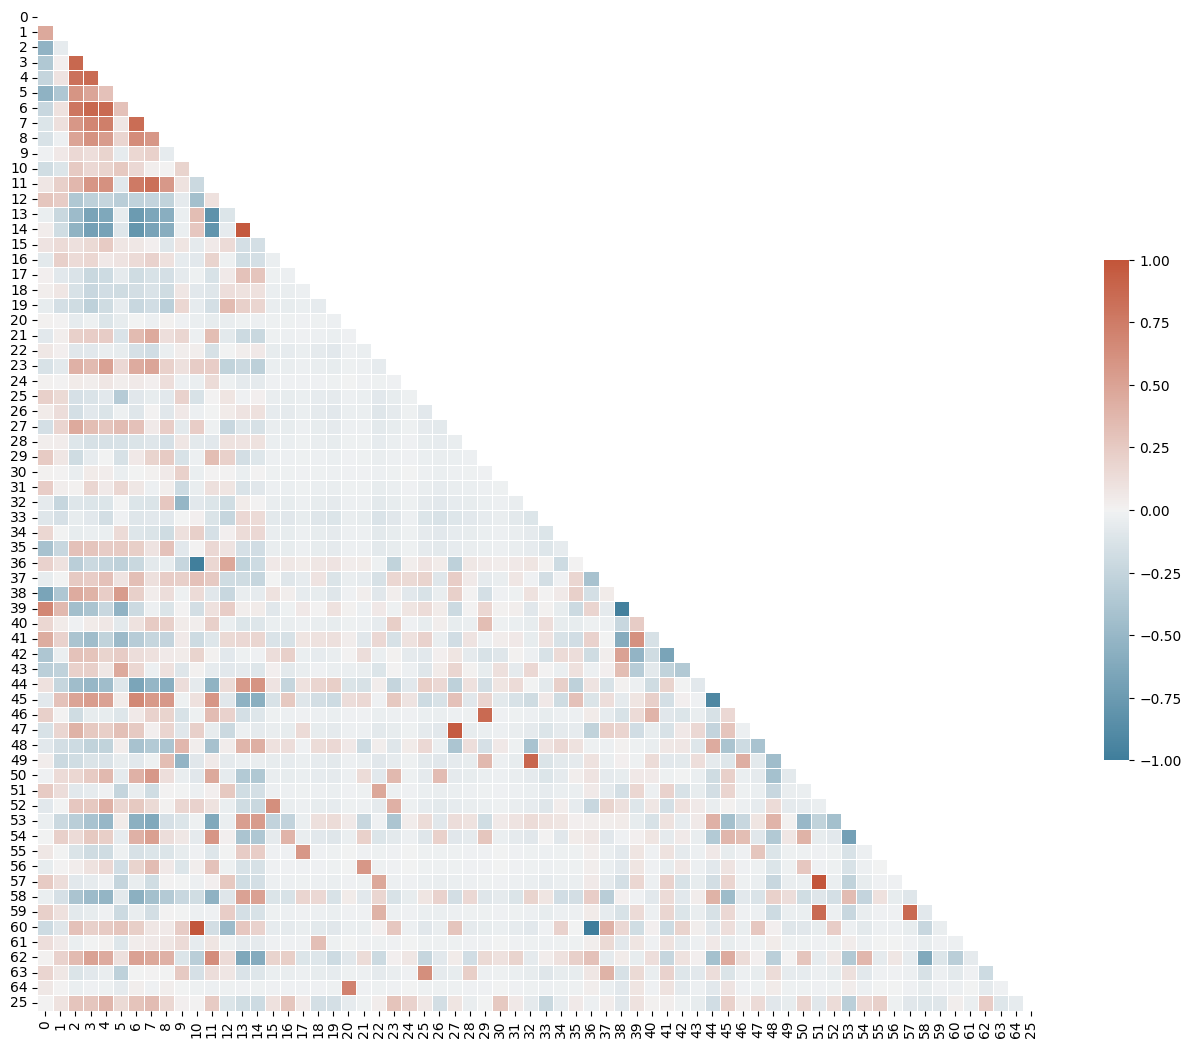

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
import numpy as np

In [ ]:
X[15].values

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_subset = X[[7, 15]].values
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]]))

In [ ]:
X_subset_modified

array([[2.60377358e-01, 0.00000000e+00],
       [2.60377358e-01, 0.00000000e+00],
       [3.43396226e-01, 0.00000000e+00],
       [1.81132075e-01, 1.00000000e+00],
       [2.83018868e-01, 1.00000000e+00],
       [2.83018868e-01, 1.00000000e+00],
       [2.83018868e-01, 1.00000000e+00],
       [2.83018868e-01, 1.00000000e+00],
       [2.64150943e-01, 1.00000000e+00],
       [1.77358491e-01, 0.00000000e+00],
       [1.77358491e-01, 0.00000000e+00],
       [3.88679245e-01, 0.00000000e+00],
       [3.88679245e-01, 0.00000000e+00],
       [3.88679245e-01, 0.00000000e+00],
       [5.58490566e-01, 0.00000000e+00],
       [5.58490566e-01, 0.00000000e+00],
       [5.58490566e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.39622642e-01, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.094339

In [ ]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    lr = LR()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])  # найдем веса линейной модели
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)   # визуализируем прямую

Text(0.5, 0, 'x')

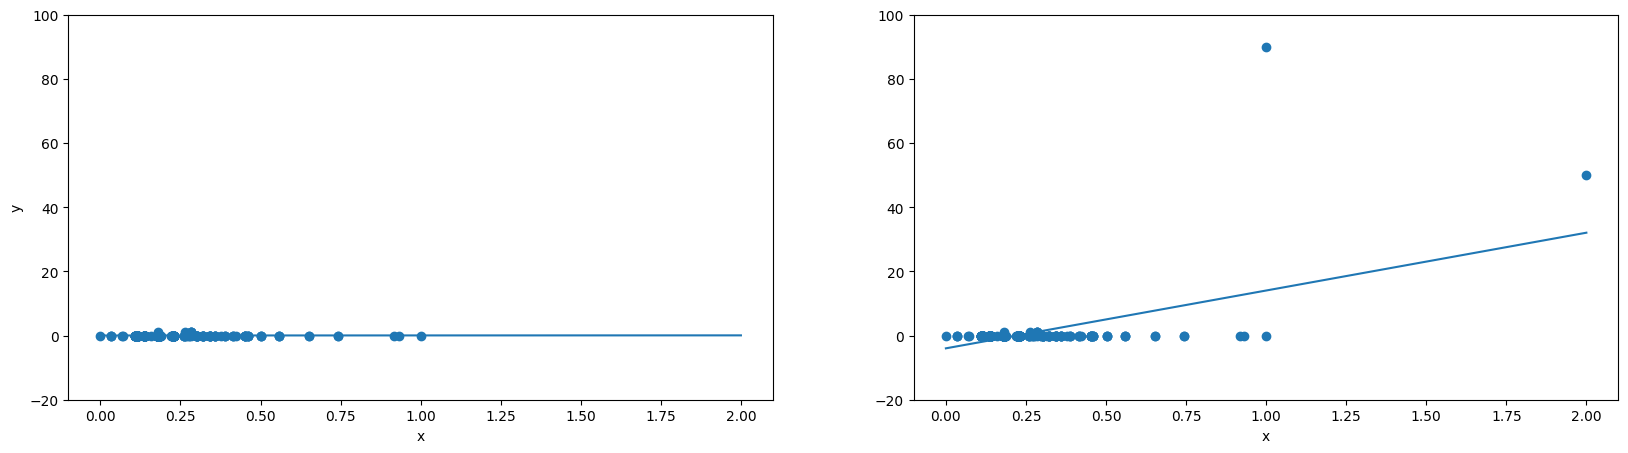

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
def scatter_points_and_plot_line_MAE(X_subset):
    mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset, columns=["f7", "f15"])) # задаем зависимость и передаем данные
    res = mod.fit(q=0.5)
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    grid = np.linspace(0, 2, 100)
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
    return mod, res

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0


Text(0.5, 0, 'x')

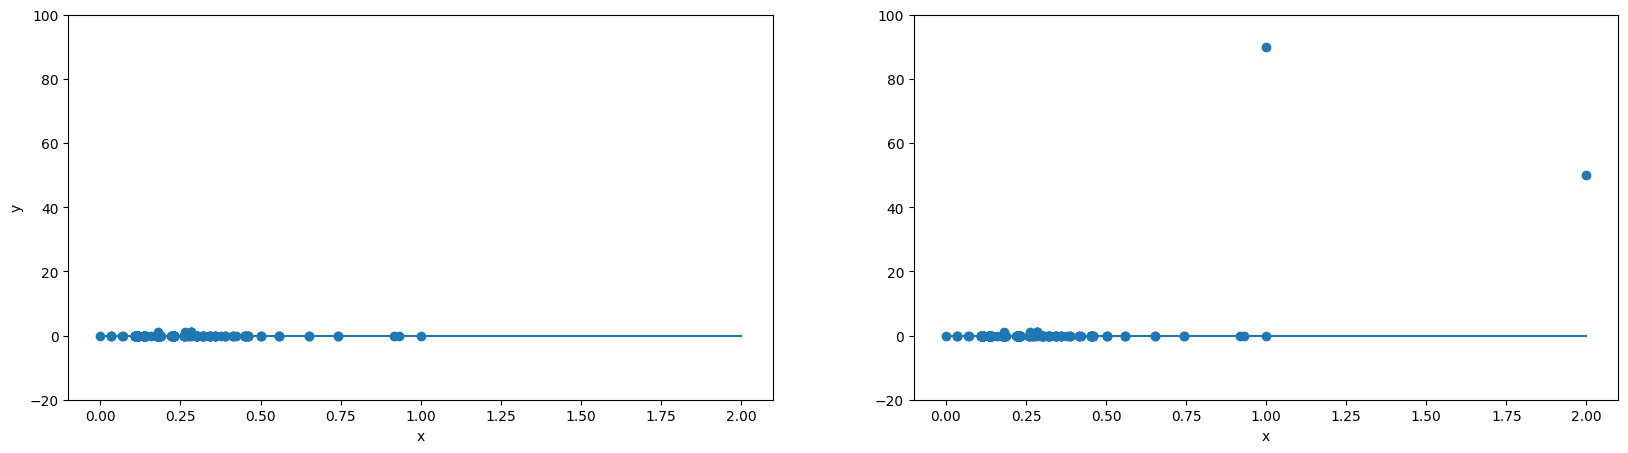

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

In [ ]:
X_subset_modified_twice = np.vstack((X_subset_modified, np.random.randint(5, size=60).reshape(-1, 2)*[1, 30]))

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0


Text(0.5, 0, 'x')

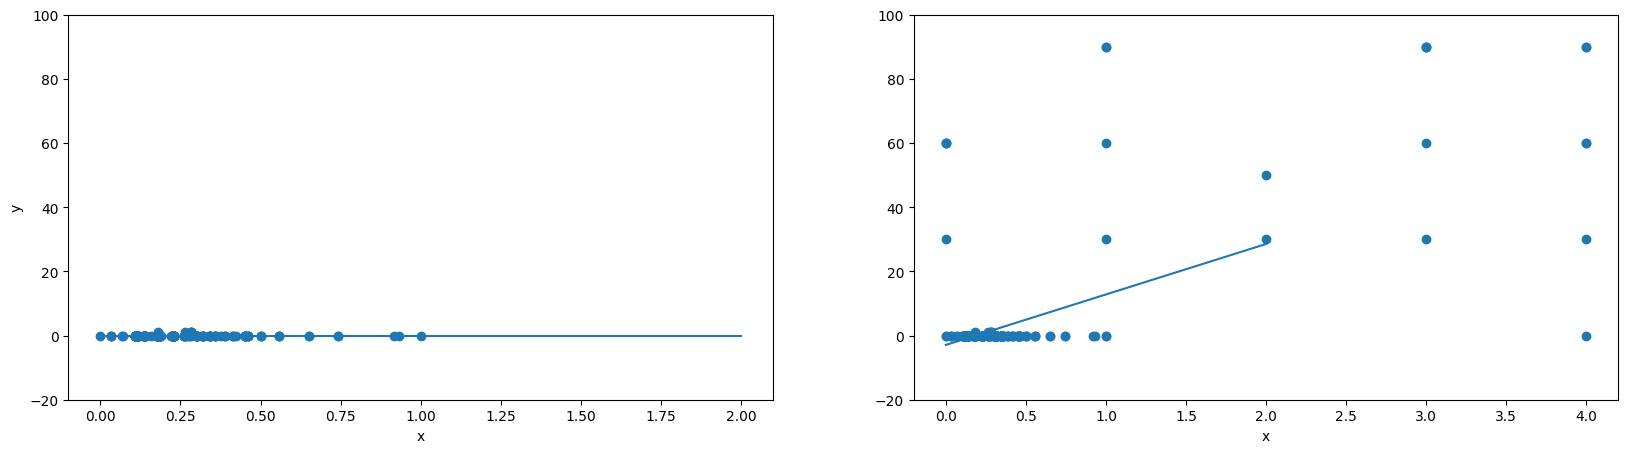

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified_twice)
plt.ylim(-20, 100)
plt.xlabel("x")